<a href="https://colab.research.google.com/github/abhilash1910/AI-Geometric-Learning/blob/master/Euclidean_Manifold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Euclidean Manifold

In this notebook,we will be seeing how to implement the different functionalities that exist in a Euclidean subspace. Euclidean space has the criteria that the shortest distance between every two points is a straight line joining them. The following operations are implemented:

- Square Distance: Squared Euclidean distance between any 2 points in an $n$ dimensional Euclidean manifold is given by $d= \sum_{i=0}^n(\delta x_{i})^2$

- Normalization: Normalization of a vector in Euclidean subspace is denoted as $${||x||_p = \big(\displaystyle\sum_i |x_i|^p\big)^{1/p}| }$$ where $p=2$ . The norm is used  to normalize the vector/tensor along n dimensional space.

- Autogradient Computation: This the most important aspect of Euclidean subspace. These are related to backpropagation in generic Euclidean learning methods. The loss function is backpropagated to acquire the gradients (Jacobian). In case of autogradient libraries like Pytorch, this is denoted as :
$v_{m,n} =
 \begin{pmatrix}
  \delta l/\delta y_{1} \cdots & \delta l/\delta y_{n} \\ 
 \end{pmatrix}$ T

 where $\delta l$ denotes the loss function to optimize and $\delta y_{i}$ denotes the variables against which the optimization is to be attained. To get the gradient of the loss $\delta l$ with respect to the weights $X$ the Jacobian matrix $J$ is vector-multiplied with the vector $v$

 $J_{m,n} =
\begin{pmatrix}
  \delta y_{1}/\delta x_{1} \cdots & \delta y_{m}/\delta x_{1} \\
   \vdots  & \vdots    \\
  \delta y_{1}/\delta x_{n} \cdots & \delta y_{m}/\delta x_{n} \\
 \end{pmatrix}$

 $v_{n,m}= 
 \begin{pmatrix}
  \delta l/\delta y_{1} \cdots & \delta l/\delta y_{n} \\ 
 \end{pmatrix}$

   $Autograd=J_{n,m}v_{n,m}$

- Convert Euclidean Tensor to Reiman Manifold: This is used to convert the gradient of a Euclidean point (subspace) into a Reiman Tensor. This is done by broadcasting the shapes of the input tensors to their corresponding Rieman counterpart.

- Projections: This implies projecting a vector $u$ on another vector $v$ or a plane $P$. For vector-vector projection we use

  $proj= u-(u.v/|v|^2).v$

 and replacing $v$ with the normal vector $n$ to the plane $P$, we get the vector projection on the plane.

- Logmaps and Tangents: This corresponds to logarithmic map of 2 vectors in a Euclidean subfield which is interpreted as $y-x$ (x,y are vectors).The tangent computes the tangent of a particular vector in Euclidean subspace.

In this case, we are using [Pytorch](https://pytorch.org/) tensors for the different Euclidean operations. In most of the cases, we are using a multidimensional Euclidean tensor and the vectors are plotted using the [Geomstat](https://geomstats.github.io/index.html) library.



In [ ]:
!pip install geomstats

Normalize the vector in Euclidean manifold:  tensor([[0.1048, 0.2097, 0.3145],
        [0.4193, 0.5241, 0.6290]])
Square distance in Euclidean manifold:  tensor([27.])
Autogradient of a vector in Euclidean manifold:  tensor([[ 3., 12., 27.]])
Autogradient torch tensors  in Euclidean space to Reiman tensors at point a:  tensor([1.5000, 2.5000, 3.5000])
Projection of vector u on v:  tensor([-0.3846, -0.4615, -0.1538])
Tangent of a vector in Euclidean space:  tensor([-1.5574,  0.0000,  0.0000])
Logarithm of vectors logu(v):  tensor([6., 6., 2.])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


,Euclidean Manifold Operations,Tensors
0,Normalize the vector in Euclidean manifold,"[[tensor(0.1048), tensor(0.2097), tensor(0.314..."
1,Square distance in Euclidean manifold,[tensor(27.)]
2,Autogradient of a vector in Euclidean manifold,"[[tensor(3.), tensor(12.), tensor(27.)]]"
3,Autogradient torch tensors in Euclidean space...,"[tensor(1.5000), tensor(2.5000), tensor(3.5000)]"
4,Projection of vector u on v,"[tensor(-0.3846), tensor(-0.4615), tensor(-0.1..."
5,Tangent of a vector in Euclidean space,"[tensor(-1.5574), tensor(0.), tensor(0.)]"
6,Logarithm of vectors logu(v),"[tensor(6.), tensor(6.), tensor(2.)]"


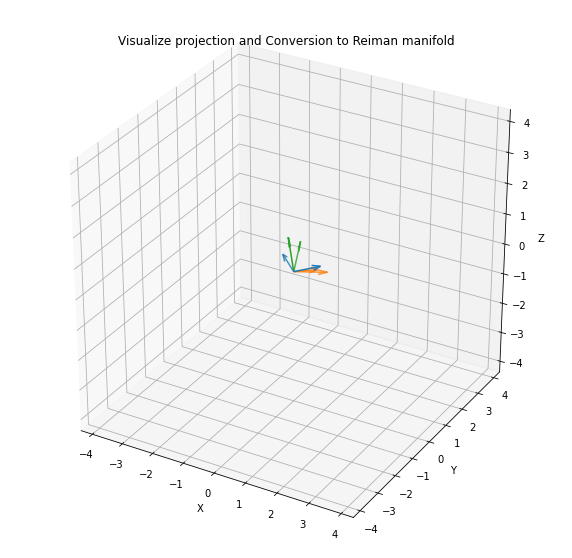

In [ ]:
import torch
import numpy as np
from typing import Tuple
import itertools
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from geomstats import visualization
import pandas as pd
class Euclidean_Manifold():
    """Euclidean class which creates a Euclidean Manifold and implements different Euclidean parameters"""

    def normalize(self, p:torch.tensor)->torch.tensor:
        """Normalize a vector in Euclidean plane. (v/|v|)"""
        scalar=torch.norm(p)
        p=torch.div(p,scalar)
        return p

    def sq_dist(self, p1:torch.tensor, p2:torch.tensor)->torch.tensor:
        """Euclidean square distance between 2 vectors .(u-v)**2"""
        return torch.abs(p1 - p2).pow(2).sum(dim=-1)

    def eq(self,x:torch.tensor)->torch.tensor:
      """Loss equation on Euclidean manifold for gradient computation"""
      z=x.pow(3)
      return z.sum()

    def compute_autograd(self,var:torch.tensor)->torch.tensor:
      """Autogradient computation using backpropagation in Euclidean subspace.
        v=J (dl/dy1......dl/dyn)T   
      """
      temp_tensor=torch.tensor(var,requires_grad=True)
      eq_tensor=self.eq(temp_tensor)
      eq_tensor.backward()
      out_tensor= temp_tensor.grad.detach().clone()
      return out_tensor

    def broadcast_shapes(self,*shapes: Tuple[int]) -> Tuple[int]:
      """Helper function for broadcasting numpy tensors"""
      result = []
      for dims in itertools.zip_longest(*map(reversed, shapes), fillvalue=1):
          dim: int = 1
          for d in dims:
              if dim != 1 and d != 1 and d != dim:
                  raise ValueError("Shapes can't be broadcasted")
              elif d > dim:
                  dim = d
          result.append(dim)
      return tuple(reversed(result))   

    def egrad_to_rgrad(self,a:torch.tensor,b:torch.tensor)->torch.tensor:
      """Convert autogradient torch tensors  in Euclidean space to Reiman tensors at point a"""
      shape=self.broadcast_shapes(a.shape,b.shape)
      return b.expand(shape)
    
    def proj_u_on_v(self,a:torch.tensor,b:torch.tensor)->torch.tensor:
      """Projection of vector u to v. (u- (u.n/|n|**2)n)"""
      b_norm=torch.norm(b)
      return (torch.dot(a,b)/b_norm**2)*b
  
    def proj_u_on_plane(self,a:torch.tensor,b:torch.tensor)->torch.tensor:
      """Projection of vector u  on n. (u- (u.n/|n|**2)n)"""
      n_norm=torch.norm(b)
      return (torch.dot(a,b)/n_norm**2)*b

    def tan_vector(self,a:torch.tensor)->torch.tensor:
      """Tangent to a vector"""
      return torch.tan(a)

    def log_map(self,a:torch.tensor,b:torch.tensor)->torch.tensor:
      """Logarithmic mapping logx(y)"""
      return b-a
    def exp_map(self,a:torch.tensor,b:torch.tensor)->torch.tensor:
      """Exponential map in Euclidean subspace"""
      return a+b
      
    def plotter(seld,a:torch.tensor):
      a=a.numpy()
      fig = plt.figure(figsize=(10, 10))
      ax = fig.add_subplot(111, projection='3d')
      ax = visualization.plot(y, ax=ax, space='SO3_GROUP', alpha=0.8,label="Vector")
  
#Create object of Euclidean class
e=Euclidean_Manifold()

#Normalize the vector in Euclidean manifold
res=e.normalize(torch.tensor([[1.,2.,3.],[4.,5.,6.]]))
print("Normalize the vector in Euclidean manifold: ",res)

#Square distance between 2 vectors in Euclidean manifold
res_dist=e.sq_dist(torch.tensor([[1.,2.,3.]]),torch.tensor([[4.,5.,6.]]))
print("Square distance in Euclidean manifold: ",res_dist)

#Input tensor for autogradients 
x=torch.tensor([[1.,2.,3.]],requires_grad=True)
res_autograd=e.compute_autograd(x)
print("Autogradient of a vector in Euclidean manifold: ",res_autograd)

#Input tensor for conversion to Reiman tensor at point z
z=torch.tensor([1.,2.,3.])
y=torch.tensor([1.5,2.5,3.5])
res_rgrad=e.egrad_to_rgrad(z,y)
#e.plotter(res_rgrad)
print("Autogradient torch tensors  in Euclidean space to Reiman tensors at point a: ",res_rgrad)

#Projection onf vector u on v
u=torch.tensor([-1.,0.,0.])
v=torch.tensor([5.,6.,2.])
res_projuv=e.proj_u_on_v(u,v)
#e.plotter(res_projuv)
print("Projection of vector u on v: ",res_projuv)

#Tangent of a vector
res_tan=e.tan_vector(u)
#e.plotter(res_tan)
print("Tangent of a vector in Euclidean space: ",res_tan)

#Log map of a vector wrt another vector logx(y)=y-x
res_logmap=e.log_map(u,v)
#e.plotter(res_logmap)
print("Logarithm of vectors logu(v): ",res_logmap)

df=pd.DataFrame(columns=["Euclidean Manifold Operations","Tensors"])
man_list=["Normalize the vector in Euclidean manifold","Square distance in Euclidean manifold","Autogradient of a vector in Euclidean manifold","Autogradient torch tensors  in Euclidean space to Reiman tensors at point a",
          "Projection of vector u on v","Tangent of a vector in Euclidean space","Logarithm of vectors logu(v)"]
val_list=[res,res_dist,res_autograd,res_rgrad,res_projuv,res_tan,res_logmap]
df["Euclidean Manifold Operations"]=man_list
df["Tensors"]=val_list




fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
res_projuvnumpy=res_projuv.numpy()
res_logmapnumpy=res_logmap.numpy()
res_rgradnumpy=res_rgrad.numpy()
ax = visualization.plot(res_projuvnumpy, ax=ax, space='SO3_GROUP', alpha=1.0,label="Vector")
# ax = visualization.plot(res_logmapnumpy, ax=ax, space='SO3_GROUP', alpha=0.8,label="Vector")
ax = visualization.plot(res_rgradnumpy, ax=ax, space='SO3_GROUP', alpha=0.8,label="Vector")
ax.set_title('Visualize projection and Conversion to Reiman manifold')
df